In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("habr data.csv", index_col="Unnamed: 0")
df.head()

,text
0,"Привет, Хабр! Сегодня разберём, какреализовать..."
1,Старший iOS-разработчик red_mad_robot Аня Коче...
2,"Еще до начала MWC в Барселоне было очевидно, ч..."
3,Взлом Instagram*‑аккаунта — популярный запрос ...
4,"Привет, Хабр! Меня зовут Кирилл Прямов, я мене..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1131 entries, 0 to 1130
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1131 non-null   object
dtypes: object(1)
memory usage: 17.7+ KB


Проверим наличие дубликатов и удалим их

In [8]:
df.duplicated().sum()

24

In [9]:
df.drop_duplicates(inplace=True)

In [13]:
import re
import string

import nltk
import pymorphy3
import wordcloud

In [14]:
stopwords = nltk.corpus.stopwords.words("russian") + [
    "хабр", "хабра"
]

punctuation = string.punctuation + "—‑"
morph = pymorphy3.MorphAnalyzer()

In [16]:
def remove_punctuations(text: str) -> str:
    return re.sub(f"[{punctuation}]", " ", text)
    return "".join([char for char in text if char not in punctuation])

def remove_digits(text: str) -> str:
    return "".join([char for char in text if not char.isdigit()])

def remove_latinic(text: str) -> str:
    return re.sub("[a-z]", "", text)

def remove_multiple_spaces(text: str) -> str:
    return re.sub(r"\s+", " ", text.replace("\\n", " ").replace("\\t", " "))

def tokenize(text: str) -> list:
    return re.split("\W+", text)

def lemmatize(tokenized_text: list) -> list:
    return [morph.parse(word)[0].normal_form for word in tokenized_text]

def remove_stop_words(tokenized_text: list) -> list:
    return [word for word in tokenized_text if word not in stopwords]

def join_to_string(tokenized_text: list) -> str:
    return " ".join(tokenized_text)

In [18]:
df["preprocessed_text"] = df["text"].apply(lambda x: remove_punctuations(x.lower()))
df.head()

,text,preprocessed_text
0,"Привет, Хабр! Сегодня разберём, какреализовать...",привет хабр сегодня разберём какреализовать...
1,Старший iOS-разработчик red_mad_robot Аня Коче...,старший ios разработчик red mad robot аня коче...
2,"Еще до начала MWC в Барселоне было очевидно, ч...",еще до начала mwc в барселоне было очевидно ч...
3,Взлом Instagram*‑аккаунта — популярный запрос ...,взлом instagram аккаунта популярный запрос ...
4,"Привет, Хабр! Меня зовут Кирилл Прямов, я мене...",привет хабр меня зовут кирилл прямов я мене...


In [19]:
df["preprocessed_text"] = df["preprocessed_text"].apply(lambda x: remove_digits(x))
df.head()

,text,preprocessed_text
0,"Привет, Хабр! Сегодня разберём, какреализовать...",привет хабр сегодня разберём какреализовать...
1,Старший iOS-разработчик red_mad_robot Аня Коче...,старший ios разработчик red mad robot аня коче...
2,"Еще до начала MWC в Барселоне было очевидно, ч...",еще до начала mwc в барселоне было очевидно ч...
3,Взлом Instagram*‑аккаунта — популярный запрос ...,взлом instagram аккаунта популярный запрос ...
4,"Привет, Хабр! Меня зовут Кирилл Прямов, я мене...",привет хабр меня зовут кирилл прямов я мене...


In [20]:
df["preprocessed_text"] = df["preprocessed_text"].apply(lambda x: remove_latinic(x))
df.head()

,text,preprocessed_text
0,"Привет, Хабр! Сегодня разберём, какреализовать...",привет хабр сегодня разберём какреализовать...
1,Старший iOS-разработчик red_mad_robot Аня Коче...,старший разработчик аня кочешкова рассказы...
2,"Еще до начала MWC в Барселоне было очевидно, ч...",еще до начала в барселоне было очевидно что ...
3,Взлом Instagram*‑аккаунта — популярный запрос ...,взлом аккаунта популярный запрос в поисков...
4,"Привет, Хабр! Меня зовут Кирилл Прямов, я мене...",привет хабр меня зовут кирилл прямов я мене...


In [21]:
df["preprocessed_text"] = df["preprocessed_text"].apply(lambda x: remove_multiple_spaces(x))
df.head()

,text,preprocessed_text
0,"Привет, Хабр! Сегодня разберём, какреализовать...",привет хабр сегодня разберём какреализовать те...
1,Старший iOS-разработчик red_mad_robot Аня Коче...,старший разработчик аня кочешкова рассказывает...
2,"Еще до начала MWC в Барселоне было очевидно, ч...",еще до начала в барселоне было очевидно что хо...
3,Взлом Instagram*‑аккаунта — популярный запрос ...,взлом аккаунта популярный запрос в поисковиках...
4,"Привет, Хабр! Меня зовут Кирилл Прямов, я мене...",привет хабр меня зовут кирилл прямов я менедже...


In [22]:
df["preprocessed_text"] = df["preprocessed_text"].apply(lambda x: tokenize(x))
df.head()

,text,preprocessed_text
0,"Привет, Хабр! Сегодня разберём, какреализовать...","[привет, хабр, сегодня, разберём, какреализова..."
1,Старший iOS-разработчик red_mad_robot Аня Коче...,"[старший, разработчик, аня, кочешкова, рассказ..."
2,"Еще до начала MWC в Барселоне было очевидно, ч...","[еще, до, начала, в, барселоне, было, очевидно..."
3,Взлом Instagram*‑аккаунта — популярный запрос ...,"[взлом, аккаунта, популярный, запрос, в, поиск..."
4,"Привет, Хабр! Меня зовут Кирилл Прямов, я мене...","[привет, хабр, меня, зовут, кирилл, прямов, я,..."


In [23]:
%%time
df["preprocessed_text"] = df["preprocessed_text"].apply(lambda x: lemmatize(x))
df.head()

CPU times: total: 3min 44s
Wall time: 3min 47s


,text,preprocessed_text
0,"Привет, Хабр! Сегодня разберём, какреализовать...","[привет, хабра, сегодня, разобрать, какреализо..."
1,Старший iOS-разработчик red_mad_robot Аня Коче...,"[старший, разработчик, аня, кочешкова, рассказ..."
2,"Еще до начала MWC в Барселоне было очевидно, ч...","[ещё, до, начало, в, барселона, быть, очевидны..."
3,Взлом Instagram*‑аккаунта — популярный запрос ...,"[взлом, аккаунт, популярный, запрос, в, поиско..."
4,"Привет, Хабр! Меня зовут Кирилл Прямов, я мене...","[привет, хабра, я, звать, кирилл, прям, я, мен..."


In [24]:
df["preprocessed_text"] = df["preprocessed_text"].apply(lambda x: remove_stop_words(x))
df.head()

,text,preprocessed_text
0,"Привет, Хабр! Сегодня разберём, какреализовать...","[привет, сегодня, разобрать, какреализовать, т..."
1,Старший iOS-разработчик red_mad_robot Аня Коче...,"[старший, разработчик, аня, кочешкова, рассказ..."
2,"Еще до начала MWC в Барселоне было очевидно, ч...","[ещё, начало, барселона, очевидный, хотя, опер..."
3,Взлом Instagram*‑аккаунта — популярный запрос ...,"[взлом, аккаунт, популярный, запрос, поисковик..."
4,"Привет, Хабр! Меня зовут Кирилл Прямов, я мене...","[привет, звать, кирилл, прям, менеджер, развит..."


In [25]:
%%time
df["preprocessed_text"] = df["preprocessed_text"].apply(lambda x: join_to_string(x))
df.head()

CPU times: total: 31.2 ms
Wall time: 36.9 ms


,text,preprocessed_text
0,"Привет, Хабр! Сегодня разберём, какреализовать...",привет сегодня разобрать какреализовать тестир...
1,Старший iOS-разработчик red_mad_robot Аня Коче...,старший разработчик аня кочешкова рассказывать...
2,"Еще до начала MWC в Барселоне было очевидно, ч...",ещё начало барселона очевидный хотя оператор п...
3,Взлом Instagram*‑аккаунта — популярный запрос ...,взлом аккаунт популярный запрос поисковик поэт...
4,"Привет, Хабр! Меня зовут Кирилл Прямов, я мене...",привет звать кирилл прям менеджер развитие дав...


Теперь, после предварительной обработки текста можно отобразить облоко слов и расширить список стом слов.

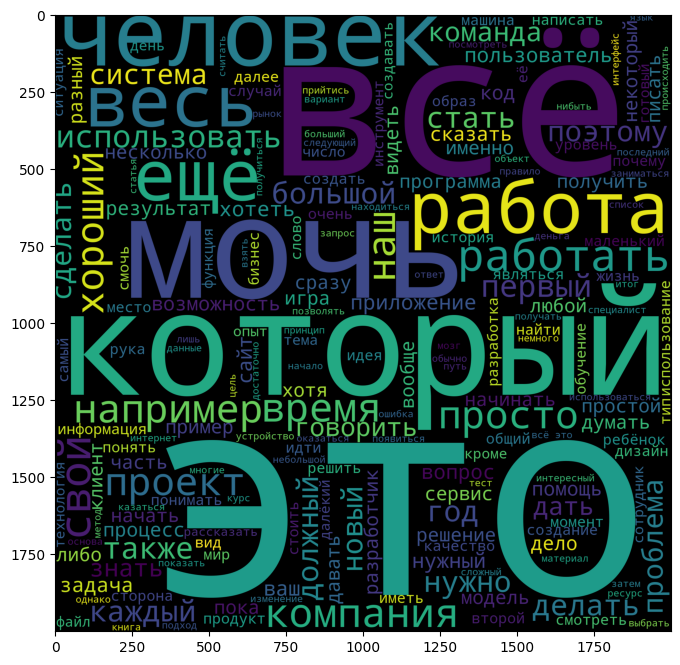

CPU times: total: 10.7 s
Wall time: 10.9 s


In [27]:
%%time
from wordcloud import WordCloud

text = " ".join(word for word in df["preprocessed_text"])

plt.figure(figsize=(8, 8))
plt.imshow(WordCloud(background_color="black", width=2000, height=2000, random_state=42).generate(text))
plt.show()

## Векторизация

In [30]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# Создаём и обучаем модель
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df["preprocessed_text"])

CPU times: total: 766 ms
Wall time: 767 ms


In [31]:
tfidf_matrix.shape

(1107, 51326)

In [32]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['éé', 'öü', 'ɐɔɐһый', 'ɯǝʚɯоэтый', 'аа', 'ааа', 'аааа', 'ааааа',
       'аааааааааааа', 'ааааааааааааааааа', 'аарон', 'аба', 'абаджи',
       'абак', 'абасмирзоев', 'абб', 'аббатта', 'аббревиатура',
       'абвгдеёзийклмнопрстуфхцьъыэ', 'абгарян', 'абдул', 'абдульманов',
       'абель', 'аберрация', 'абзац', 'абзацный', 'абидно', 'абие',
       'абий', 'абитуриент', 'абк', 'аблация', 'аблютофобия', 'абон',
       'абонемент', 'абонент', 'абонентский', 'абориген', 'аборт',
       'абразив', 'абразивность', 'абракадабра', 'абрам', 'абрамзона',
       'абрамов', 'абрамович', 'абрахам', 'абрин', 'абрином', 'аброботка',
       'абрус', 'абсолоютный', 'абсолют', 'абсолютизировать', 'абсолютно',
       'абсолютность', 'абсолютный', 'абсорбировать', 'абсорбироваться',
       'абсорбция', 'абстрагирование', 'абстрагировать',
       'абстрагироваться', 'абстрактно', 'абстрактность', 'абстрактный',
       'абстракционизм', 'абстракционизманейросетевой', 'абстракционист',
       'абстракция

## Кластеризация

Теперь, так как текст векторизирован, можно кластеризировать данные

In [37]:
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans

nmf_model = NMF(n_components=7, random_state=0)
W = nmf_model.fit_transform(tfidf_matrix)

In [38]:
%%time

cluster_range = range(1, 25)
wcss = []

# Обучаем модели несколько раз
for i in cluster_range:
    # Создаём и обучем модель
    kmeans = KMeans(n_clusters=i, n_init=10, init="k-means++", random_state=42).fit(W)
    wcss.append(kmeans.inertia_)

CPU times: total: 10.1 s
Wall time: 1.41 s


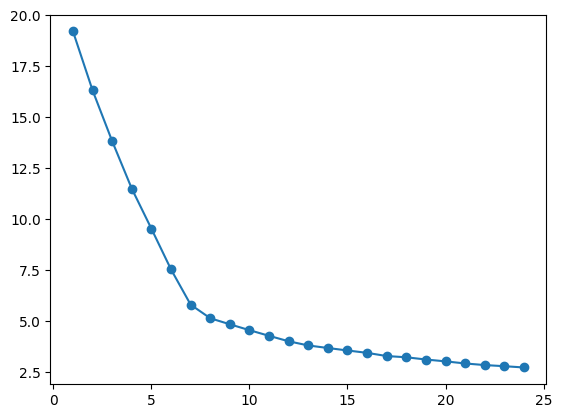

In [39]:
plt.plot(cluster_range, wcss, marker="o")
plt.show()

In [40]:
kmeans = KMeans(n_clusters=7, n_init=10, random_state=42)
labels = kmeans.fit_predict(W)
centers = kmeans.cluster_centers_

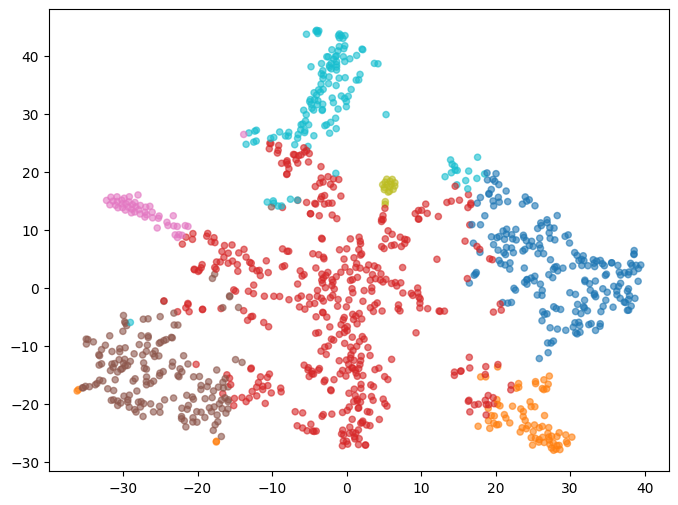

In [42]:
from sklearn.manifold import TSNE

x_tsne = TSNE(n_components=2, random_state=42).fit_transform(W)

plt.figure(figsize=(8, 6))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=labels, s=20, cmap="tab10", alpha=0.6)
plt.show()

In [45]:
df["cluster"] = labels
df.sample()

,text,preprocessed_text,cluster
684,С геймификацией быта большинство из нас впервы...,геймификация быт большинство впервые столкнуть...,2


In [47]:
df["cluster"].value_counts()

cluster
2    453
0    208
3    170
6    134
1     76
4     49
5     17
Name: count, dtype: int64

In [49]:
pd.set_option("display.max_colwidth", 100)

for i in range(7):
    print(f"cluster: {i}: ")
    print(f"{df[df["cluster"] == i].sample(1)[["text"]].values}\n")

cluster: 0: 
[['Несколько дней назад команда инженеров Facebook отличилась — ее удостоили награды Most Influential POPL Paper Award. В среде специалистов по машинному обучению это весьма почетно. Награду вручили за работу Compositional Shape Analysis by Means of Bi-abduction, которая раскрывает нюансы Project Infer. Сам проект предназначен для обнаружения и ликвидации багов в коде мобильного приложения перед его деплоем.\n\r\nБаги в программном обеспечении для мобильных устройств обходятся очень дорого как разработчикам, так и пользователям. Что касается первых, то обнаружение проблемы в уже размещенном в каталогах приложении — ночной кошмар для любого специалиста. Конечно, софт тестируется, работу программ проверяют по определенным шаблонам. Но чаще разработчики не могут предусмотреть всего, и баги в приложении обнаруживаются уже после деплоя.\n\nНапоминаем: для всех читателей «Хабра» — скидка 10 000 рублей при записи на любой курс Skillbox по промокоду «Хабр».\n\nSkillbox рекомендует

## Тематическое моделирование

In [52]:
import gensim
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [54]:
%%time
df["tokenized_preprocessed_text"] = df["preprocessed_text"].apply(lambda x: tokenize(x))

gensim_dictionary = gensim.corpora.Dictionary(df["tokenized_preprocessed_text"])
gensim_dictionary.filter_extremes(no_above=0.1, no_below=5)
gensim_dictionary.compactify()

corpus = [gensim_dictionary.doc2bow(text) for text in df["tokenized_preprocessed_text"]]
topics_range = range(3, 25, 1)
coherence_values = []

for num_topics in topics_range:
    lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        num_topics=num_topics,
        id2word=gensim_dictionary,
        passes=10,
        random_state=42)
    
    coherence_model = gensim.models.CoherenceModel(
        model=lda_model,
        texts=df["tokenized_preprocessed_text"],
        dictionary=gensim_dictionary,
        coherence="c_v")
    
    coherence_values.append(coherence_model.get_coherence())

CPU times: total: 8min 55s
Wall time: 19min 35s


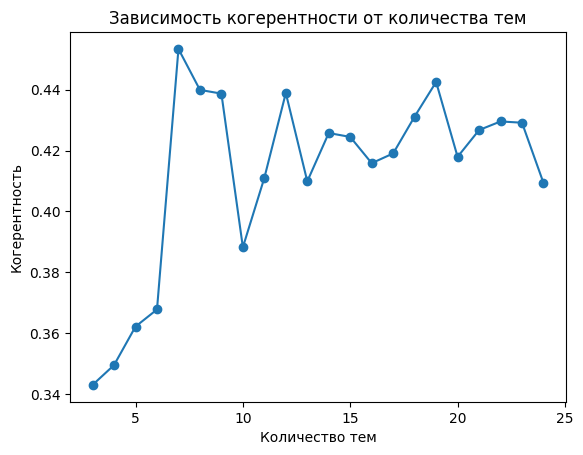

In [56]:
plt.plot(topics_range, coherence_values, marker="o")
plt.xlabel("Количество тем")
plt.ylabel("Когерентность")
plt.title("Зависимость когерентности от количества тем")
plt.show()

In [59]:
for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {", ".join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[::-1][:10]])}")

Topic 0: это, всё, который, человек, мочь, очень, свой, делать, время, весь
Topic 1: приложение, код, это, который, файл, использовать, функция, разработчик, всё, данные
Topic 2: курс, вебинар, разработчик, обучение, программирование, программист, язык, онлайн, студент, веб
Topic 3: такси, сервис, яндекс, компания, водитель, агрегатор, заказ, год, услуга, поездка
Topic 4: сайт, дизайн, студия, лебедев, дизайнер, артемий, веб, шрифт, страница, логотип
Topic 5: доклад, команда, компания, конференция, сотрудник, работа, проект, продукт, спикер, рассказать
Topic 6: робот, промобот, человек, робототехника, компания, технология, ия, искусственный, система, интеллект


In [61]:
lda = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=gensim_dictionary, passes=10, random_state=42)
vis_data = gensimvis.prepare(lda, corpus, gensim_dictionary)
pyLDAvis.display(vis_data)

In [63]:
for i in range(7):
    gensim_dictionary = gensim.corpora.Dictionary(df.loc[df["cluster"].isin([i]), "tokenized_preprocessed_text"])
    doc_count = len(df.loc[df["cluster"].isin([i]), "tokenized_preprocessed_text"])

    if doc_count >= 100:
        gensim_dictionary.filter_extremes(no_above=0.1, no_below=5)
    elif doc_count >= 50:
        gensim_dictionary.filter_extremes(no_above=0.3, no_below=3)
    else:
        gensim_dictionary.filter_extremes(no_above=0.5, no_below=2)
        
    gensim_dictionary.compactify()

    corpus = [gensim_dictionary.doc2bow(text) for text in df.loc[df["cluster"].isin([i]), "tokenized_preprocessed_text"]]
    lda = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=gensim_dictionary, passes=10, random_state=42)

    print(f"\nТемы кластера {i}:")
    
    for j in lda.print_topics():
        print(j)


Темы кластера 0:
(0, '0.011*"миграция" + 0.005*"нативный" + 0.005*"фронтенд" + 0.004*"сетка" + 0.004*"доступность" + 0.004*"эксперт" + 0.004*"партнёр" + 0.004*"студент" + 0.004*"твой" + 0.003*"дизайнер"')
(1, '0.122*"лицензия" + 0.062*"рейтинг" + 0.012*"узел" + 0.010*"оглавление" + 0.009*"пайплайна" + 0.008*"распределённый" + 0.007*"граф" + 0.007*"тег" + 0.006*"коммит" + 0.006*"движок"')
(2, '0.022*"анимация" + 0.014*"герой" + 0.012*"игровой" + 0.009*"враг" + 0.007*"счётчик" + 0.007*"игрок" + 0.006*"кадр" + 0.005*"кластер" + 0.005*"движок" + 0.004*"синхронизация"')
(3, '0.012*"диск" + 0.008*"терминал" + 0.007*"контроллер" + 0.006*"хост" + 0.006*"эмулятор" + 0.005*"буфер" + 0.004*"атрибут" + 0.004*"служба" + 0.004*"последовательный" + 0.004*"курсор"')
(4, '0.009*"метрика" + 0.008*"тестировщик" + 0.007*"уведомление" + 0.006*"кластер" + 0.005*"трассировка" + 0.005*"инцидент" + 0.005*"профиль" + 0.005*"алерот" + 0.004*"нагрузочный" + 0.004*"заказчик"')

Темы кластера 1:
(0, '0.005*"пользо

Проанализировав полученный результат, по полученным словам можно выделить следующие темы:
* "IT-разработка"
* "IT-образование"
* "Технологии будущего"
* "IT в бизнесе"
* "Инфраструктура городских сервисов"
* "Технологии и человеческий фактор"
* "Брендинг и маркетинг"

Добавим в набор данных информацию о принадлежности к теме

In [66]:
df["cluster name"] = df["cluster"].map({
    0: "IT-разработка",
    1: "IT-образование",
    2: "Искуственный интелект",
    3: "IT в бизнесе",
    4: "Инфраструктура городских сервисов",
    5: "Технологии и человеческий фактор",
    6: "Брендинг и маркетинг",
})

In [67]:
df["cluster name"].value_counts()

cluster name
Искуственный интелект                453
IT-разработка                        208
IT в бизнесе                         170
Брендинг и маркетинг                 134
IT-образование                        76
Инфраструктура городских сервисов     49
Технологии и человеческий фактор      17
Name: count, dtype: int64

In [68]:
df.to_csv("habr articles (cluster).csv", index=False)

In [69]:
pd.set_option("display.max_colwidth", 50)

In [70]:
df = pd.read_csv("habr articles (cluster).csv")
df.sample(1)

,text,preprocessed_text,cluster,tokenized_preprocessed_text,cluster name
8,"Когда организации переходят в облако, их систе...",организация переходить облако система начинать...,0,"['организация', 'переходить', 'облако', 'систе...",IT-разработка


## Классификация

In [73]:
from sklearn.model_selection import train_test_split

# Оставим 66% для обучающей выборкки и 33% для тестовой выборкки
X_train, X_test, y_train, y_test = train_test_split(W, df["cluster"], test_size=0.33, random_state=42)

In [74]:
print(X_train.shape)
print(X_test.shape)

(741, 7)
(366, 7)


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Далее обучим каждую модель

In [80]:
%%time
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train);
rfc_predict = rfc.predict(X_test)

CPU times: total: 141 ms
Wall time: 139 ms


In [81]:
%%time
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train);
dtc_predict = dtc.predict(X_test)

CPU times: total: 0 ns
Wall time: 2.99 ms


In [158]:
%%time
knn = KNeighborsClassifier(weights='distance')
knn.fit(X_train, y_train);
knn_predict = knn.predict(X_test)

CPU times: total: 15.6 ms
Wall time: 17.9 ms


In [163]:
from sklearn.metrics import classification_report

In [165]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        84
           1       0.88      0.88      0.88        26
           2       0.95      0.98      0.96       142
           3       0.93      0.93      0.93        58
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4
           6       0.94      0.89      0.92        38

    accuracy                           0.95       366
   macro avg       0.95      0.95      0.95       366
weighted avg       0.95      0.95      0.95       366



In [167]:
print(classification_report(y_test, dtc_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        84
           1       0.88      0.88      0.88        26
           2       0.97      0.95      0.96       142
           3       0.95      0.95      0.95        58
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4
           6       0.92      0.92      0.92        38

    accuracy                           0.95       366
   macro avg       0.95      0.95      0.95       366
weighted avg       0.95      0.95      0.95       366



In [169]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        84
           1       0.91      0.81      0.86        26
           2       0.93      0.96      0.94       142
           3       0.90      0.97      0.93        58
           4       1.00      0.93      0.96        14
           5       1.00      1.00      1.00         4
           6       1.00      0.87      0.93        38

    accuracy                           0.95       366
   macro avg       0.96      0.93      0.94       366
weighted avg       0.95      0.95      0.94       366



Показатели очень хорошие, лучший F1-score у KNeighborsClassifier.